# Import Libraries

In [ ]:
pip install yoloface

  Preparing metadata (setup.py) ... done
  Created wheel for yoloface: filename=yoloface-0.0.4-py3-none-any.whl size=5967 sha256=bd5808465e817d427aa4cdff110b14c4367df04f5b55fb8c51af0ea48dee1164
  Stored in directory: /root/.cache/pip/wheels/c9/6b/62/3ca061bd4188557f748912b72d346dd58de3acb73a64cc10c3
Successfully built yoloface


In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
import cv2

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import keras
import matplotlib.pyplot as plt


In [ ]:
from yoloface import face_analysis

In [ ]:
from tqdm.notebook import tqdm

# Download dataset

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download Dataset
!kaggle datasets download -d leewanhung/diverse-asian-facial-ages

 89% 148M/167M [00:01<00:00, 115MB/s]
100% 167M/167M [00:01<00:00, 108MB/s]


In [ ]:
!unzip -q /content/diverse-asian-facial-ages.zip

# Process dataset

In [ ]:
len(os.listdir('/content/Data_all'))

248

In [ ]:
data_df = pd.read_csv('/content/Data_label.csv')
data_df

,Img,Age,Gender,Quality,Face angle
0,img1,3.0,Boy,Normal,Straight
1,img2,4.0,Girl,Normal,Straight
2,img3,2.0,Girl,Poor,Straight
3,img4,4.0,Girl,Normal,Straight
4,img5,3.0,Girl,Normal,Right
...,...,...,...,...,...
351,NaN,NaN,NaN,NaN,NaN
352,NaN,NaN,NaN,NaN,NaN
353,NaN,NaN,NaN,NaN,NaN
354,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_df.dropna(inplace=True)
data_df.reset_index(inplace=True)
data_df

,index,Img,Age,Gender,Quality,Face angle
0,0,img1,3.0,Boy,Normal,Straight
1,1,img2,4.0,Girl,Normal,Straight
2,2,img3,2.0,Girl,Poor,Straight
3,3,img4,4.0,Girl,Normal,Straight
4,4,img5,3.0,Girl,Normal,Right
...,...,...,...,...,...,...
242,330,img331,73.0,Boy,Good,Straight
243,331,img332,77.0,Boy,Good,Straight
244,332,img333,73.0,Boy,Good,Straight
245,333,img334,87.0,Boy,Good,Straight


In [ ]:
data_df['Gender'].unique()

array(['Boy', 'Girl', 'boy', 'Boy ', 'girl'], dtype=object)

In [ ]:
# create a gender column if Gender is Boy then 0 if Gender is Girl then 1

data_df['gender'] = data_df['Gender'].apply(lambda x: 0 if x.lower() == 'boy' else 1)


In [ ]:
data_df['image'] = data_df['Img'].apply(lambda x: f'/content/Data_all/{x}.jpg')

**Crop faces from images**

In [ ]:
face=face_analysis()

Downloading...
From: https://drive.google.com/uc?id=1JYrRT4Xe-NTrxYGhcj_hy7NtL4D2c77v
To: /content/.yoloface/yolov3-tiny_face.weights
100%|██████████| 34.7M/34.7M [00:00<00:00, 48.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S4W6mpOQgVvjpPupbhW6rHFjl-OaUR-g
To: /content/.yoloface/yolov3_tiny_face.cfg
100%|██████████| 2.09k/2.09k [00:00<00:00, 6.85MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1EFlRsOA6oGLLBH2VMDOqHSfDI70CDXeW
From (redirected): https://drive.google.com/uc?id=1EFlRsOA6oGLLBH2VMDOqHSfDI70CDXeW&confirm=t&uuid=42f12e6a-b520-4403-af77-03c76166c89f
To: /content/.yoloface/face_detection.weights
100%|██████████| 246M/246M [00:01<00:00, 133MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZxUmO0B1435taazz8P0Pqjq8r8Rypeip
To: /content/.yoloface/face_detection.cfg
100%|██████████| 8.34k/8.34k [00:00<00:00, 22.3MB/s]


*Example usage:*

In [ ]:
img,box,conf=face.face_detection(image_path='/content/Data_all/img4.jpg',model='tiny')
# x_top_left, y_top_left, height, width = box[i]
# img is cv2.array

array([[[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       ...,

       [[15,  9, 50],
        [18, 11, 52],
        [19, 13, 53],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[19, 13, 54],
        [21, 16, 57],
        [23, 17, 58],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[19, 15, 56],
        [22, 18, 58],
        [23, 19, 60],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
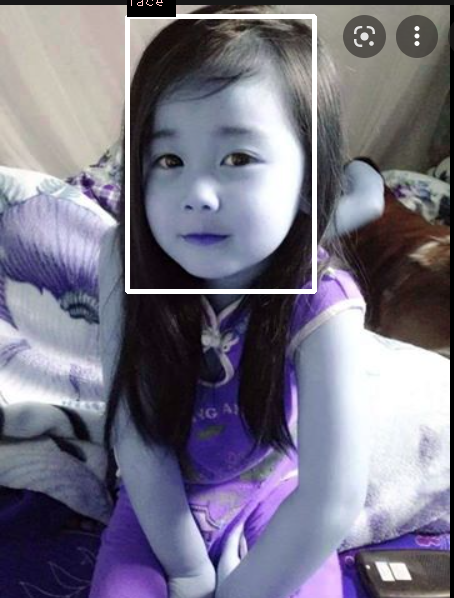

In [ ]:
output_frame=face.show_output(img,box,frame_status=True)
output_frame

In [ ]:
def crop_biggest_face(image_path):
  """
  This function crops the biggest face from an image.

  Args:
    image_path: path to the image.

  Returns:
    A PIL object containing the cropped image with the biggest face.
  """

  # Find all faces in the image
  img,boxes,conf=face.face_detection(image_path, model='tiny')

  # Sort the faces by size
  boxes.sort(key=lambda box: box[2] * box[3], reverse = True)

  # Crop the biggest face
  if len(boxes) > 0:
    x_top_left, y_top_left, height, width = boxes[0]
    cropped_image = img[y_top_left : y_top_left + height, x_top_left : x_top_left + width]
  else:
    cropped_image = img

  try:
    image_pil = Image.fromarray(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
  except:
    image_pil = Image.open(image_path)

  # Convert mode to RGB:
  image_pil = image_pil.convert('RGB')

  return image_pil


In [ ]:
images = []
ages = []
genders = []

for i in tqdm(range(len(data_df))):
  image_path = data_df['image'][i]
  if not os.path.exists(image_path):
    print(f'{image_path} not exists.')
    continue

  ages.append(int(data_df['Age'][i]))
  genders.append(int(data_df['gender'][i]))
  images.append(crop_biggest_face(image_path=image_path))

  0%|          | 0/247 [00:00<?, ?it/s]

In [ ]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.Image.Image image mode=RGB size=166x241 a...,3,0
1,<PIL.Image.Image image mode=RGB size=295x508 a...,4,1
2,<PIL.Image.Image image mode=RGB size=116x195 a...,2,1
3,<PIL.Image.Image image mode=RGB size=187x275 a...,4,1
4,<PIL.Image.Image image mode=RGB size=190x246 a...,3,1
...,...,...,...
242,<PIL.Image.Image image mode=RGB size=288x477 a...,73,0
243,<PIL.Image.Image image mode=RGB size=281x386 a...,77,0
244,<PIL.Image.Image image mode=RGB size=79x126 at...,73,0
245,<PIL.Image.Image image mode=RGB size=222x315 a...,87,0


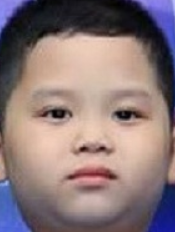

6 0


In [ ]:
i = 20
display(df['Images'][i])
print(df['Ages'][i], df['Genders'][i])

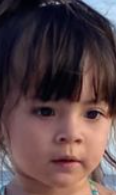

2 1
(116, 195)


In [ ]:
i = 2
display(df['Images'][i])
print(df['Ages'][i], df['Genders'][i])
print(df['Images'][i].size)

**Visualize data**

<ipython-input-24-93eb04555b5d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

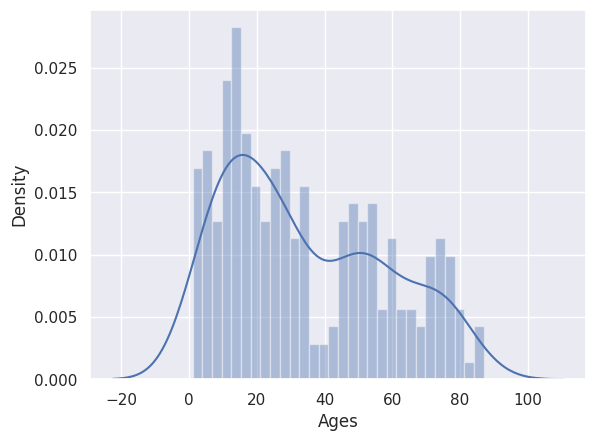

In [ ]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=30)

In [ ]:
df['Genders'].unique()

array([0, 1])

<Axes: xlabel='Genders', ylabel='count'>

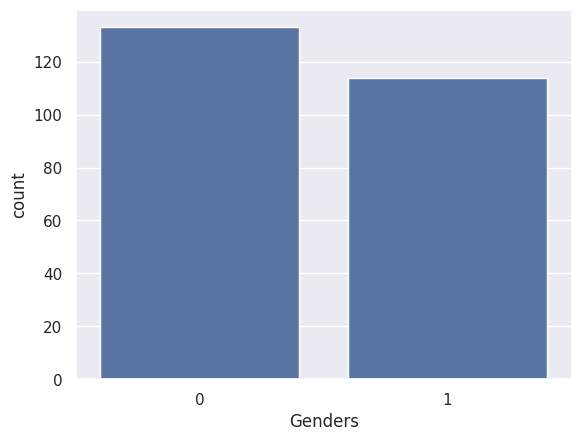

In [ ]:
sns.countplot(x = 'Genders', data = df)

**Get training and testing data**

In [ ]:
x = []

for i in range(len(df)):
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
  ar = np.asarray(df['Images'].iloc[i])
  x.append(ar)

<ipython-input-27-8f5eb79b4ea8>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
<ipython-input-27-8f5eb79b4ea8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)


In [ ]:
x = np.array(x)

In [ ]:
x.shape

(247, 200, 200, 3)

In [ ]:
y_age = df['Ages']
y_gender = df['Genders']

# x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.1)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.1)

# Create models

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.9:
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

# plot_graphs(history, "accuracy")
# plot_graphs(history, "loss")

In [ ]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
                 optimizer=optimizers.Adam(lr=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
                 optimizer=optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

**Age model**

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

callbacks = myCallback()

In [ ]:
history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1,
                        callbacks = [callbacks])

In [ ]:
agemodel.save('/content/age_model_asian.keras')

In [ ]:
plot_graphs(history1, "loss")

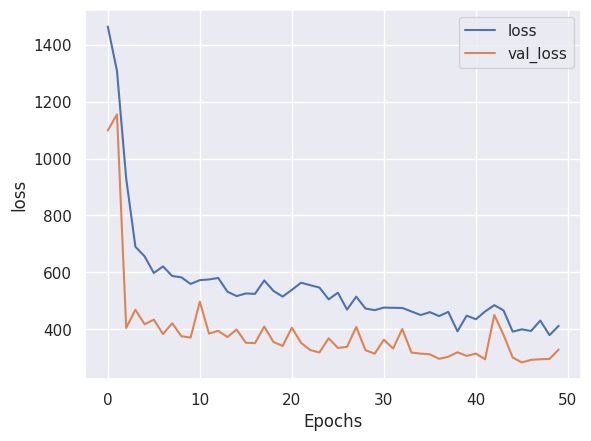

**Gender model**

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

callbacks = myCallback()

In [ ]:
history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2,
                        callbacks = [callbacks])

Epoch 1/50
4/4 [==============================] - 3s 584ms/step - loss: 0.4023 - accuracy: 0.8288 - val_loss: 0.6828 - val_accuracy: 0.6400
Epoch 2/50
4/4 [==============================] - 2s 483ms/step - loss: 0.4365 - accuracy: 0.8108 - val_loss: 0.6722 - val_accuracy: 0.7200
Epoch 3/50
4/4 [==============================] - 2s 588ms/step - loss: 0.3905 - accuracy: 0.8063 - val_loss: 0.6341 - val_accuracy: 0.7200
Epoch 4/50
4/4 [==============================] - 2s 599ms/step - loss: 0.4007 - accuracy: 0.8333 - val_loss: 0.5963 - val_accuracy: 0.7200
Epoch 5/50
4/4 [==============================] - 3s 983ms/step - loss: 0.3958 - accuracy: 0.8108 - val_loss: 0.6206 - val_accuracy: 0.7200
Epoch 6/50
4/4 [==============================] - 2s 480ms/step - loss: 0.3687 - accuracy: 0.8198 - val_loss: 0.5654 - val_accuracy: 0.6800
Epoch 7/50
4/4 [==============================] - 2s 466ms/step - loss: 0.3900 - accuracy: 0.8153 - val_loss: 0.6442 - val_accuracy: 0.8000
Epoch 8/50
4/4 [====

In [ ]:
genmodel.save('/content/genmodel_asian.keras')

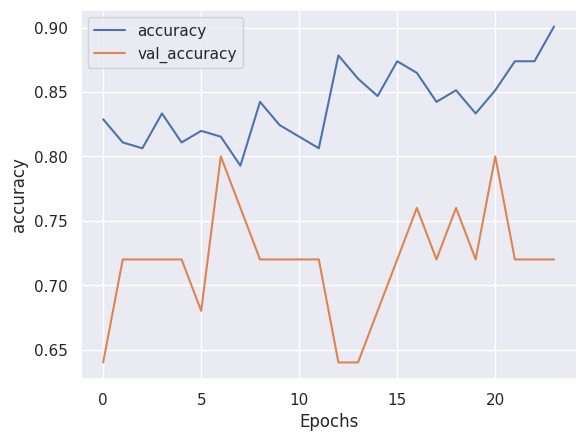

In [ ]:
plot_graphs(history2, 'accuracy')

**Predict new sample**

In [ ]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)

    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)

    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'

    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS)

# Using Transfer Learning with VGG16 and ResNet50 models

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

**Get VGG16 pretrained model**

In [ ]:
vgg16 = VGG16(input_shape=(200, 200, 3), weights='imagenet', include_top=False)
for layer in vgg16.layers:
    layer.trainable = False
vgg16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

**Get ResNet50 pretrained model**

In [ ]:
resnet50 = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(200, 200, 3)
)

In [ ]:
for layer in resnet50.layers:
    layer.trainable = False

resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 100, 100, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

<h2>Create Age model</h2>

**With VGG16**

In [ ]:
output = Flatten()(vgg16.output)
output = Dense(500, activation='relu')(output)
output = Dense(100, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='relu')(output)

agemodel_vgg16 = Model(inputs=vgg16.input, outputs=output)
agemodel_vgg16.compile(
    loss='mean_squared_error',
    optimizer=optimizers.Adam(lr=0.0001)
)
agemodel_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [ ]:
history_agemodel_vgg16 = agemodel_vgg16.fit(train1,
                                            batch_size=32,
                                            epochs=50,
                                            validation_data=test1,
                                            shuffle=True,
                                            callbacks = [callbacks])

Epoch 1/50
7/7 [==============================] - 19s 2s/step - loss: 931.2380 - val_loss: 660.1435
Epoch 2/50
7/7 [==============================] - 2s 337ms/step - loss: 521.1895 - val_loss: 435.9283
Epoch 3/50
7/7 [==============================] - 2s 331ms/step - loss: 411.6598 - val_loss: 395.2181
Epoch 4/50
7/7 [==============================] - 2s 328ms/step - loss: 418.5876 - val_loss: 317.2924
Epoch 5/50
7/7 [==============================] - 3s 476ms/step - loss: 374.1443 - val_loss: 298.7669
Epoch 6/50
7/7 [==============================] - 2s 329ms/step - loss: 299.1773 - val_loss: 360.1577
Epoch 7/50
7/7 [==============================] - 2s 326ms/step - loss: 262.7849 - val_loss: 231.4608
Epoch 8/50
7/7 [==============================] - 2s 316ms/step - loss: 240.1424 - val_loss: 245.3036
Epoch 9/50
7/7 [==============================] - 2s 329ms/step - loss: 221.4736 - val_loss: 230.4314
Epoch 10/50
7/7 [==============================] - 3s 473ms/step - loss: 230.5188 - 

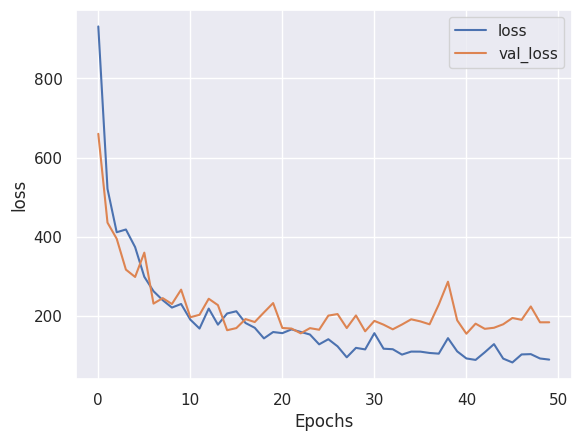

In [ ]:
plot_graphs(history_agemodel_vgg16, 'loss')

In [ ]:
agemodel_vgg16.save('/content/agemodel_asian_vgg16.keras')

**With ResNet50**

In [ ]:
output = Flatten()(resnet50.output)
output = Dense(500, activation='relu')(output)
output = Dense(100, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='relu')(output)
agemodel_resnet50 = Model(inputs=resnet50.input, outputs=output)
agemodel_resnet50.compile(
    loss='mean_squared_error',
    optimizer=optimizers.Adam(lr=0.0001)
)
agemodel_resnet50.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 100, 100, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
history_agemodel_resnet50 = agemodel_resnet50.fit(train1,
                                            batch_size=32,
                                            epochs=50,
                                            validation_data=test1,
                                            shuffle=True,
                                            callbacks = [callbacks])

Epoch 1/50
7/7 [==============================] - 12s 905ms/step - loss: 1283.8314 - val_loss: 650.1424
Epoch 2/50
7/7 [==============================] - 2s 314ms/step - loss: 943.2097 - val_loss: 676.4426
Epoch 3/50
7/7 [==============================] - 2s 313ms/step - loss: 602.5933 - val_loss: 640.6602
Epoch 4/50
7/7 [==============================] - 3s 441ms/step - loss: 740.9899 - val_loss: 580.8459
Epoch 5/50
7/7 [==============================] - 2s 307ms/step - loss: 628.3407 - val_loss: 580.2294
Epoch 6/50
7/7 [==============================] - 2s 318ms/step - loss: 718.1286 - val_loss: 625.1434
Epoch 7/50
7/7 [==============================] - 2s 326ms/step - loss: 603.1149 - val_loss: 582.3533
Epoch 8/50
7/7 [==============================] - 2s 316ms/step - loss: 651.3076 - val_loss: 588.3721
Epoch 9/50
7/7 [==============================] - 3s 435ms/step - loss: 619.1003 - val_loss: 581.4418
Epoch 10/50
7/7 [==============================] - 2s 312ms/step - loss: 662.822

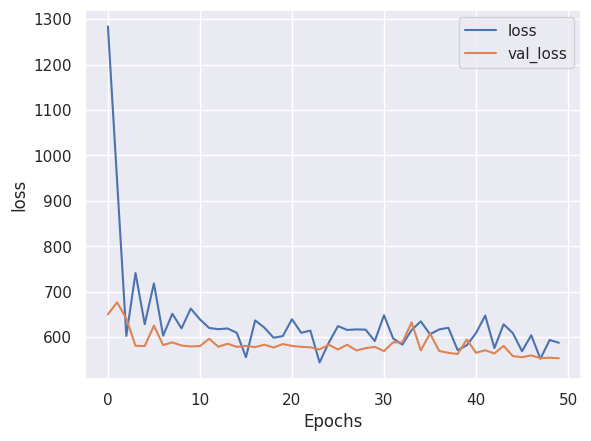

In [ ]:
plot_graphs(history_agemodel_resnet50, 'loss')

In [ ]:
agemodel_resnet50.save('/content/agemodel_asian_resnet50.keras')

<h2> Create Gender model </h2>

**With VGG16**

In [ ]:
output = Flatten()(vgg16.output)
output = Dense(500, activation='relu')(output)
output = Dense(100, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output)

genmodel_vgg16 = Model(inputs=vgg16.input, outputs=output)
genmodel_vgg16.compile(loss='binary_crossentropy',
                 optimizer=optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])
genmodel_vgg16.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [ ]:
history_genmodel_vgg16 = genmodel_vgg16.fit(train2,
                                            epochs=50,
                                            batch_size=32,
                                            shuffle=True,
                                            validation_data=test2,
                                            callbacks = [callbacks])

Epoch 1/50
4/4 [==============================] - 12s 3s/step - loss: 2.9625 - accuracy: 0.4865 - val_loss: 0.6318 - val_accuracy: 0.7200
Epoch 2/50
4/4 [==============================] - 2s 506ms/step - loss: 1.4241 - accuracy: 0.5360 - val_loss: 0.9713 - val_accuracy: 0.5200
Epoch 3/50
4/4 [==============================] - 2s 658ms/step - loss: 1.3485 - accuracy: 0.5405 - val_loss: 1.0944 - val_accuracy: 0.4800
Epoch 4/50
4/4 [==============================] - 2s 583ms/step - loss: 0.8860 - accuracy: 0.5631 - val_loss: 0.6631 - val_accuracy: 0.5200
Epoch 5/50
4/4 [==============================] - 3s 691ms/step - loss: 0.7667 - accuracy: 0.5495 - val_loss: 0.5888 - val_accuracy: 0.7200
Epoch 6/50
4/4 [==============================] - 2s 671ms/step - loss: 0.7116 - accuracy: 0.5901 - val_loss: 0.5973 - val_accuracy: 0.6800
Epoch 7/50
4/4 [==============================] - 2s 519ms/step - loss: 0.6191 - accuracy: 0.6757 - val_loss: 0.5654 - val_accuracy: 0.7200
Epoch 8/50
4/4 [======

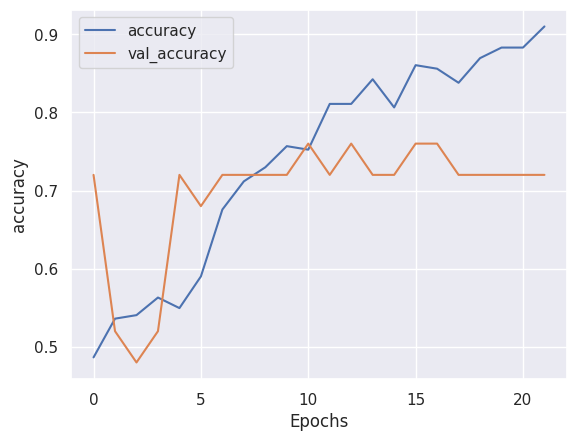

In [ ]:
plot_graphs(history_genmodel_vgg16, 'accuracy')

In [ ]:
genmodel_vgg16.save('/content/genmodel_asian_vgg16.keras')

# Try another simple CNN

**Age model**

In [ ]:
agemodel_try = Sequential()
agemodel_try.add(Conv2D(20, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel_try.add(MaxPooling2D((2,2)))
agemodel_try.add(Conv2D(50, (5,5), activation='tanh'))
agemodel_try.add(MaxPooling2D((4,4)))
agemodel_try.add(Conv2D(200, (3,3), activation='tanh'))
agemodel_try.add(MaxPooling2D((2,2)))
agemodel_try.add(Flatten())
agemodel_try.add(Dense(50, activation='relu'))
agemodel_try.add(Dropout(0.4))
agemodel_try.add(Dense(1, activation='relu'))

agemodel_try.compile(loss='mean_squared_error',
                 optimizer=optimizers.Adam(lr=0.0001))

In [ ]:
history_agemodel_try = agemodel_try.fit(train1, epochs=50, shuffle=True, validation_data=test1,
                                        callbacks = [callbacks])

Epoch 1/50
7/7 [==============================] - 6s 430ms/step - loss: 862.0476 - val_loss: 605.3502
Epoch 2/50
7/7 [==============================] - 2s 280ms/step - loss: 719.7698 - val_loss: 535.0015
Epoch 3/50
7/7 [==============================] - 2s 282ms/step - loss: 562.0237 - val_loss: 541.6405
Epoch 4/50
7/7 [==============================] - 2s 276ms/step - loss: 538.5253 - val_loss: 570.5252
Epoch 5/50
7/7 [==============================] - 2s 300ms/step - loss: 559.5963 - val_loss: 496.6045
Epoch 6/50
7/7 [==============================] - 3s 374ms/step - loss: 552.3425 - val_loss: 751.2248
Epoch 7/50
7/7 [==============================] - 2s 282ms/step - loss: 632.3745 - val_loss: 500.9930
Epoch 8/50
7/7 [==============================] - 2s 279ms/step - loss: 599.0364 - val_loss: 505.2638
Epoch 9/50
7/7 [==============================] - 2s 278ms/step - loss: 514.0471 - val_loss: 482.8866
Epoch 10/50
7/7 [==============================] - 3s 426ms/step - loss: 481.3541 

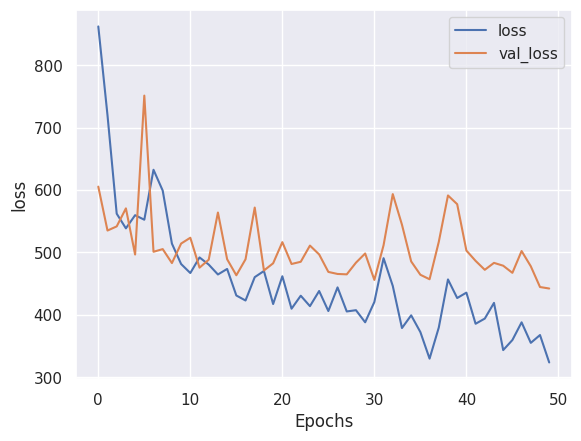

In [ ]:
plot_graphs(history_agemodel_try, 'loss')

In [ ]:
agemodel_try.save('/content/agemodel_asian_try.keras')

**Gender model**

In [ ]:
genmodel_try = Sequential()
genmodel_try.add(Conv2D(20, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel_try.add(MaxPooling2D((2,2)))
genmodel_try.add(Conv2D(50, (5,5), activation='tanh'))
genmodel_try.add(MaxPooling2D((4,4)))
genmodel_try.add(Conv2D(200, (3,3), activation='tanh'))
genmodel_try.add(MaxPooling2D((2,2)))
genmodel_try.add(Flatten())
genmodel_try.add(Dense(50, activation='relu'))
genmodel_try.add(Dropout(0.4))
genmodel_try.add(Dense(1, activation='sigmoid'))

genmodel_try.compile(loss='binary_crossentropy',
                     optimizer=optimizers.Adam(lr=0.0001),
                     metrics=['accuracy'])

In [ ]:
history_genmodel_try = genmodel_try.fit(train2,
                                        epochs=50,
                                        batch_size=32,
                                        shuffle=True,
                                        validation_data=test2,
                                        callbacks = [callbacks])

Epoch 1/50
4/4 [==============================] - 5s 885ms/step - loss: 0.8972 - accuracy: 0.5405 - val_loss: 0.8431 - val_accuracy: 0.5200
Epoch 2/50
4/4 [==============================] - 2s 471ms/step - loss: 0.7580 - accuracy: 0.5000 - val_loss: 0.8248 - val_accuracy: 0.4800
Epoch 3/50
4/4 [==============================] - 3s 624ms/step - loss: 0.6877 - accuracy: 0.5676 - val_loss: 0.6862 - val_accuracy: 0.5200
Epoch 4/50
4/4 [==============================] - 3s 565ms/step - loss: 0.6928 - accuracy: 0.4955 - val_loss: 0.6943 - val_accuracy: 0.5200
Epoch 5/50
4/4 [==============================] - 3s 781ms/step - loss: 0.6887 - accuracy: 0.5270 - val_loss: 0.7324 - val_accuracy: 0.4800
Epoch 6/50
4/4 [==============================] - 3s 802ms/step - loss: 0.6825 - accuracy: 0.5721 - val_loss: 0.6837 - val_accuracy: 0.6800
Epoch 7/50
4/4 [==============================] - 3s 707ms/step - loss: 0.6699 - accuracy: 0.5766 - val_loss: 0.8774 - val_accuracy: 0.4800
Epoch 8/50
4/4 [====

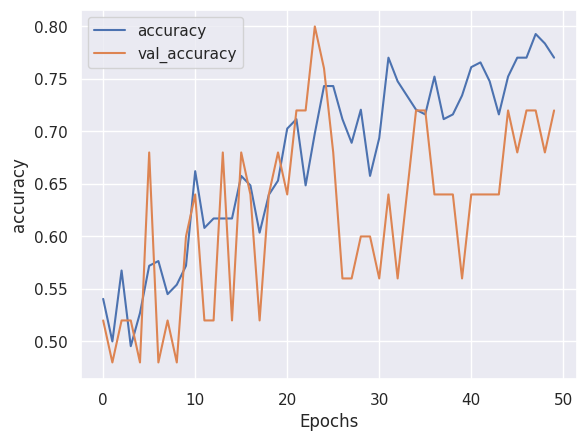

In [ ]:
plot_graphs(history_genmodel_try, 'accuracy')

In [ ]:
genmodel_try.save('/content/genmodel_asian_try.keras')

# Try using Merge dataset UTK vs. Asian

<strong>But memory overflow </strong>

In [ ]:
# Download Dataset
!kaggle datasets download -d jangedoo/utkface-new

 94% 313M/331M [00:06<00:00, 52.6MB/s]
100% 331M/331M [00:06<00:00, 54.5MB/s]


In [ ]:
!mkdir /content/utkface

In [ ]:
!unzip -q /content/utkface-new.zip -d /content/utkface

In [ ]:
images_utk = []
ages_utk = []
genders_utk = []

for i in tqdm(os.listdir('/content/utkface/crop_part1')[0:8000]):
    split = i.split('_')
    ages_utk.append(int(split[0]))
    genders_utk.append(int(split[1]))
    images_utk.append(Image.open('/content/utkface/crop_part1/' + i))

  0%|          | 0/8000 [00:00<?, ?it/s]

In [ ]:
images_utk = pd.Series(list(images_utk), name = 'Images')
ages_utk = pd.Series(list(ages_utk), name = 'Ages')
genders_utk = pd.Series(list(genders_utk), name = 'Genders')

df_utk = pd.concat([images_utk, ages_utk, genders_utk], axis=1)
df_utk

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,30,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,24,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,40,1
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,4,0
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,56,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,84,1
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,20,1


In [ ]:
df

,Images,Ages,Genders
0,<PIL.Image.Image image mode=RGB size=200x200 a...,3,0
1,<PIL.Image.Image image mode=RGB size=200x200 a...,4,1
2,<PIL.Image.Image image mode=RGB size=200x200 a...,2,1
3,<PIL.Image.Image image mode=RGB size=200x200 a...,4,1
4,<PIL.Image.Image image mode=RGB size=200x200 a...,3,1
...,...,...,...
242,<PIL.Image.Image image mode=RGB size=200x200 a...,73,0
243,<PIL.Image.Image image mode=RGB size=200x200 a...,77,0
244,<PIL.Image.Image image mode=RGB size=200x200 a...,73,0
245,<PIL.Image.Image image mode=RGB size=200x200 a...,87,0


In [ ]:
merge_df = pd.concat([df_utk, df], axis=0)
merge_df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,30,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,24,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,40,1
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,4,0
...,...,...,...
242,<PIL.Image.Image image mode=RGB size=200x200 a...,73,0
243,<PIL.Image.Image image mode=RGB size=200x200 a...,77,0
244,<PIL.Image.Image image mode=RGB size=200x200 a...,73,0
245,<PIL.Image.Image image mode=RGB size=200x200 a...,87,0


<ipython-input-111-add0cd6bedaa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

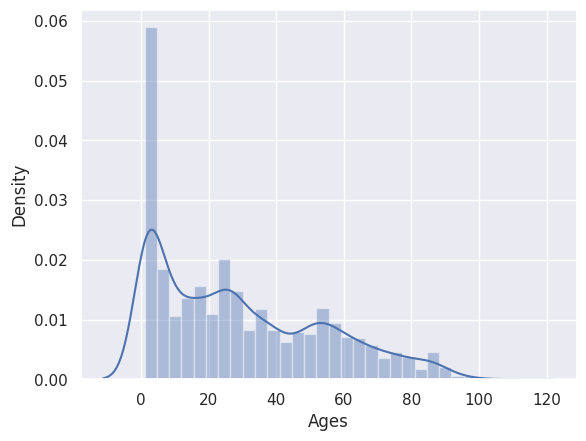

In [ ]:
sns.set_theme()
sns.distplot(merge_df['Ages'],kde=True, bins=30)

In [ ]:
under4s = []

for i in range(len(merge_df)):
    if merge_df['Ages'].iloc[i] <= 4:
        under4s.append(merge_df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

merge_df = merge_df[merge_df['Ages'] > 4]

merge_df = pd.concat([merge_df, under4s], ignore_index = True)

<ipython-input-115-a946610063c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df['Ages'],kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

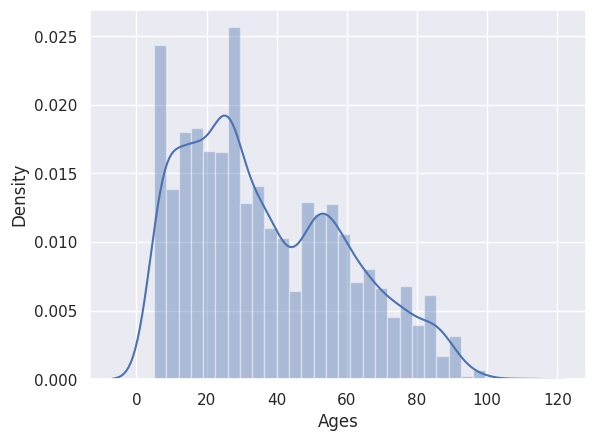

In [ ]:
sns.distplot(merge_df['Ages'],kde=True, bins=30)

In [ ]:
merge_df = merge_df[merge_df['Ages'] < 80]

<ipython-input-117-123a9074ba1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

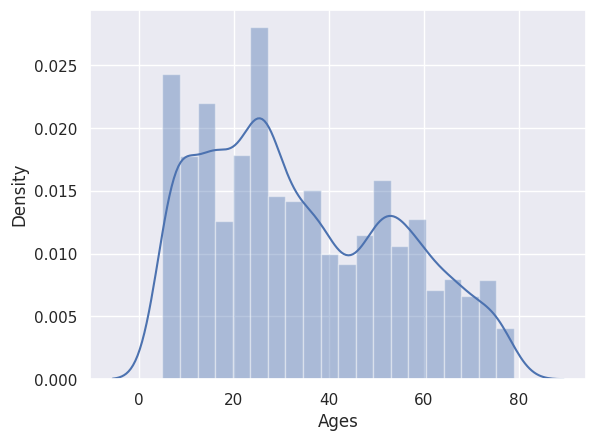

In [ ]:
sns.distplot(merge_df['Ages'],kde=True, bins=20)

In [ ]:
merge_df['Genders'].unique()

array([1, 0, 3])

In [ ]:
merge_df = merge_df[(merge_df['Genders'] == 0) | (merge_df['Genders'] == 1)]

In [ ]:
merge_df['Genders'].unique()

array([1, 0])

<Axes: xlabel='Genders', ylabel='count'>

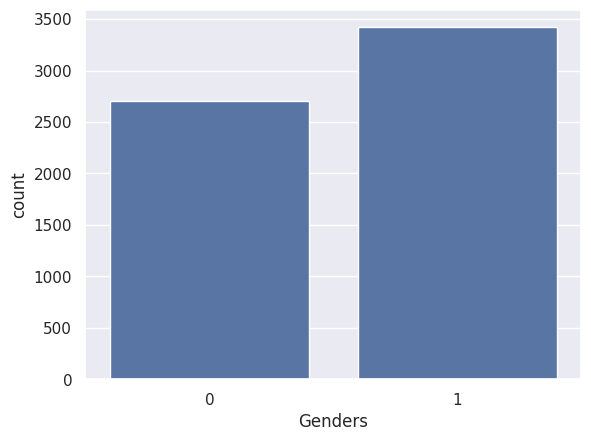

In [ ]:
sns.countplot(x = 'Genders', data = merge_df)

In [ ]:
merge_df['Images'] = merge_df['Images'].apply(lambda x: x.convert('RGB'))

In [ ]:
merge_df

,Images,Ages,Genders
0,<PIL.Image.Image image mode=RGB size=200x200 a...,30,1
1,<PIL.Image.Image image mode=RGB size=200x200 a...,24,1
2,<PIL.Image.Image image mode=RGB size=200x200 a...,40,1
3,<PIL.Image.Image image mode=RGB size=200x200 a...,19,0
4,<PIL.Image.Image image mode=RGB size=200x200 a...,56,1
...,...,...,...
6473,<PIL.Image.Image image mode=RGB size=200x200 a...,78,0
6475,<PIL.Image.Image image mode=RGB size=200x200 a...,78,0
6476,<PIL.Image.Image image mode=RGB size=200x200 a...,73,0
6477,<PIL.Image.Image image mode=RGB size=200x200 a...,77,0


In [ ]:
x_merge = []

for i in range(len(merge_df)):
  merge_df['Images'].iloc[i] = merge_df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
  ar = np.asarray(merge_df['Images'].iloc[i])
  x_merge.append(ar)

<ipython-input-135-2170cdad2da4>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  merge_df['Images'].iloc[i] = merge_df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
<ipython-input-135-2170cdad2da4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['Images'].iloc[i] = merge_df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)


In [ ]:
x_merge = np.array(x_merge)

In [ ]:
y_age_merge = merge_df['Ages']
y_gender_merge = merge_df['Genders']

x_train_age_merge, x_test_age_merge, y_train_age_merge, y_test_age_merge = train_test_split(x_merge, y_age_merge, test_size=0.2, stratify=y_age_merge)
x_train_gender_merge, x_test_gender_merge, y_train_gender_merge, y_test_gender_merge = train_test_split(x_merge, y_gender_merge, test_size=0.2, stratify=y_gender_merge)
# x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.1)
# x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.1)

In [ ]:
train_age_merge = datagen.flow(x_train_age_merge, y_train_age_merge, batch_size=32)

test_age_merge = test_datagen.flow(
        x_test_age_merge, y_test_age_merge,
        batch_size=32)

In [ ]:
train_gen_merge = datagen.flow(x_train_gender_merge, y_train_gender_merge, batch_size=64)

test_gen_merge = test_datagen.flow(
        x_test_gender_merge, y_test_gender_merge,
        batch_size=64)

callbacks = myCallback()

NameError: name 'datagen' is not defined